In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
np.random.seed(50)

# Number of Samples
N = 100

# Generate Feature : Size of the Tumor
tumor_size = np.random.normal(2.5, 1.5, N)
tumor_size = np.clip(tumor_size,0.1,10)

# Define a Weight and Bias
w = 3.0123
b = -8.211
z = w * tumor_size + b
probability = 1 / (1 + np.exp(-z))
malignant = np.random.binomial(1, probability)

df = pd.DataFrame({"Tumor_size" : tumor_size, "Malignant": malignant})
df.head()

,Tumor_size,Malignant
0,0.159472,0
1,2.453534,1
2,1.568607,0
3,0.303129,0
4,4.617919,1


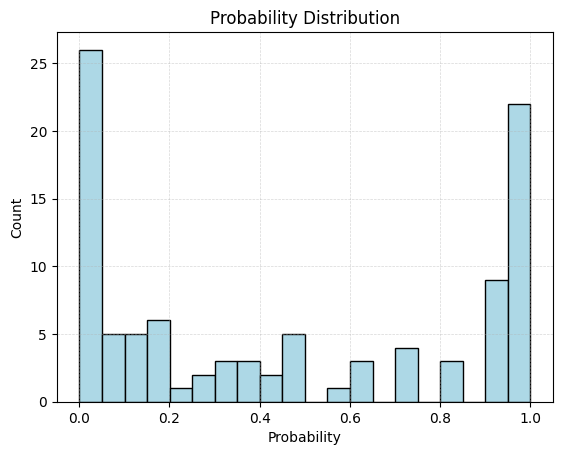

In [71]:
plt.hist(probability, bins=20, edgecolor='black', color='lightblue');
plt.title("Probability Distribution")
plt.xlabel("Probability")
plt.ylabel("Count")
plt.grid(True, linestyle='--', lw=0.5, alpha=0.5)
plt.show()

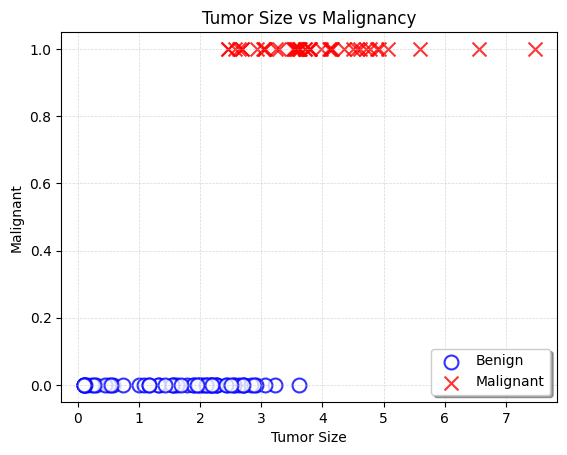

In [76]:
benign_group = df[df.Malignant == 0]
plt.scatter(benign_group.Tumor_size, benign_group.Malignant, marker='o', facecolor='white',edgecolor='blue', s=100, alpha= 0.8, lw=1.5 ,label='Benign')

malignant_group = df[df.Malignant == 1]
plt.scatter(malignant_group.Tumor_size, malignant_group.Malignant, marker='x', facecolor='red', s=100, alpha=0.8, label='Malignant')
plt.legend(loc='lower right', shadow=True)
plt.xlabel("Tumor Size")
plt.ylabel("Malignant")
plt.title("Tumor Size vs Malignancy")
plt.grid(True, linestyle='--', lw=0.5, alpha=0.5)
plt.show()

Enter Weight for Tumor Size :  3
Enter Bias for Tumor Size :  -8.3


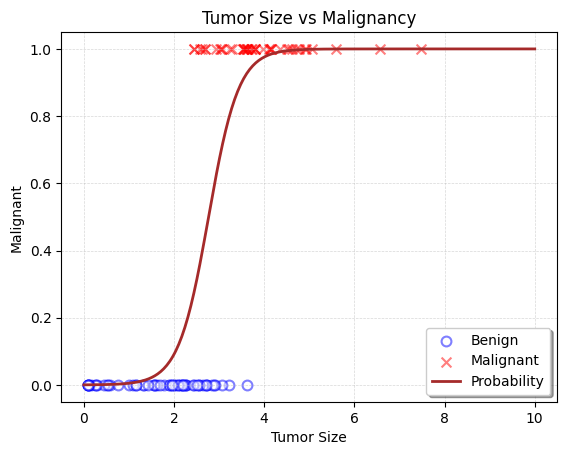

In [78]:
plt.scatter(benign_group.Tumor_size, benign_group.Malignant, marker='o', facecolor='white',edgecolor='blue', s=50, alpha= 0.5, lw=1.5 ,label='Benign')
plt.scatter(malignant_group.Tumor_size, malignant_group.Malignant, marker='x', facecolor='red', s=50, alpha=0.5, label='Malignant')
x_val = np.linspace(0,10,300)
w = float(input("Enter Weight for Tumor Size : "))
b = float(input("Enter Bias for Tumor Size : "))
z = w * x_val + b
y_val = 1 / (1 + np.exp(-z))
plt.plot(x_val, y_val, color='brown', linestyle='solid', lw=2, label='Probability')

plt.legend(loc='lower right', shadow=True)
plt.xlabel("Tumor Size")
plt.ylabel("Malignant")
plt.title("Tumor Size vs Malignancy")
plt.grid(True, linestyle='--', lw=0.5, alpha=0.5)
plt.show()

In [79]:
def sigmoid (z):
    """
    Compute the sigmoid of z
    Args:
        z (ndarray): shape(m)
    Returns:
        g_z (ndarray (m,)): returns the sigmoid of z
    """
    return 1 / (1 + np.exp(-z))

In [80]:
def compute_logistic_model (x,w,b):
    """
    Computes the prediction 
    Args:
        x (ndarray (n,m)): Data, m examples with n features
        w (ndarray (n)): Model Paramters
        b (scalary): Model Parameter
    Return:
        f_wb (ndarray (m)): prediction for y
    """
    return (x @ w + b)

In [ ]:
def compute_cost_logistic (x,y,w,b):
    """
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = y.shape[0]
    f_wb = compute_logistic_model(x,w,b)
    epsilon = 1e-15
    return -(1 / m) * np.sum(
        y * np.log(f_wb + epsilon) + (1 - y) * np.log(1 - f_wb + epsilon)
    )